<a href="https://colab.research.google.com/github/DanielRomeo/forest-fire-predictor/blob/master/Forestfire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Program that uses LOGISTIC REGRESSION to predict the likelyhood of a forest fire.**

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import warnings
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings("ignore")
import io

# PROBABILITY OF A FOREST FIRE OCCURANCE

In [2]:
from google.colab import files
uploaded = files.upload()
dataset = pd.read_csv(io.BytesIO(uploaded['Forest_fire.csv']))

Saving Forest_fire.csv to Forest_fire.csv


In [74]:
#get the data, plit it and use numpys predict function.
# here we make one simple prediction
dataset = np.array(dataset)

X = dataset[1:, 1:-1].astype('int')
y = dataset[1:, -1].astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)
log_reg = LogisticRegression()
a = log_reg.fit(X_train, y_train)

a = np.array(a)

prediction = log_reg.predict_proba([[10, 38, 45]])
prediction = '{0: {1}f}'.format(prediction[0][1], 2)
print(prediction)

 0.031566


In [ ]:
#comparing real data and the predicted data:
y_pred = log_reg.predict(X_test)

print("Real \t Predicted")
for i in range(10):
  print( y_test[i],"\t", y_pred[i])

In [98]:
#do predictions for each X_test array:
# i need to make predictions for all the test data:- so i loop 10 times
# print(X_test)

predictions_array = []
for i in range(len(X_test)):
  value = log_reg.predict_proba([X_test[i]])
  value = '{0: {1}f}'.format(value[0][1], 2)
  predictions_array.append(value)

#convert array of strings to numbes:
# predictions_array= map(float, predictions_array)
predictions_array = [float(numeric_string) for numeric_string in predictions_array]
print(predictions_array)


[1.0, 0.999918, 0.239697, 0.999909, 0.0, 0.999999, 1e-06, 0.42878, 0.0, 0.999997, 0.0, 0.999992]


In [106]:
#get values in array format of the x values and get the fiest 5 values.

oxygenData = X_test[:, 0][:5]
temperatureData = X_test[:, 1][:5]
humidityData = X_test[:, 2][:5]
y_pred = predictions_array[:5]

def getPercent(data):
  sum = 0;
  newarray = [];
  for i in range(5):
    sum += data[i];
  avarage = round(sum/5, 2);

  for j in range(5):
    val = data[j]
    val= round((val/sum)*100, 2)
    newarray.append(val)  

  return newarray;

# print(oxygenData)
oxygenData = getPercent(oxygenData)
temperatureData = getPercent(temperatureData)
humidityData = getPercent(humidityData)

#get percentage of y_pred
sum = 0;
newarray = [];
for i in range(5):
  sum += y_pred[i];
  avarage = sum/5;
y_pred_small_percentages = getPercent(y_pred)
y_pred_avarage = avarage*100
print(y_pred)
print(y_pred_avarage)
print(y_pred_small_percentages)

[1.0, 0.999918, 0.239697, 0.999909, 0.0]
64.79048
[30.87, 30.87, 7.4, 30.87, 0.0]


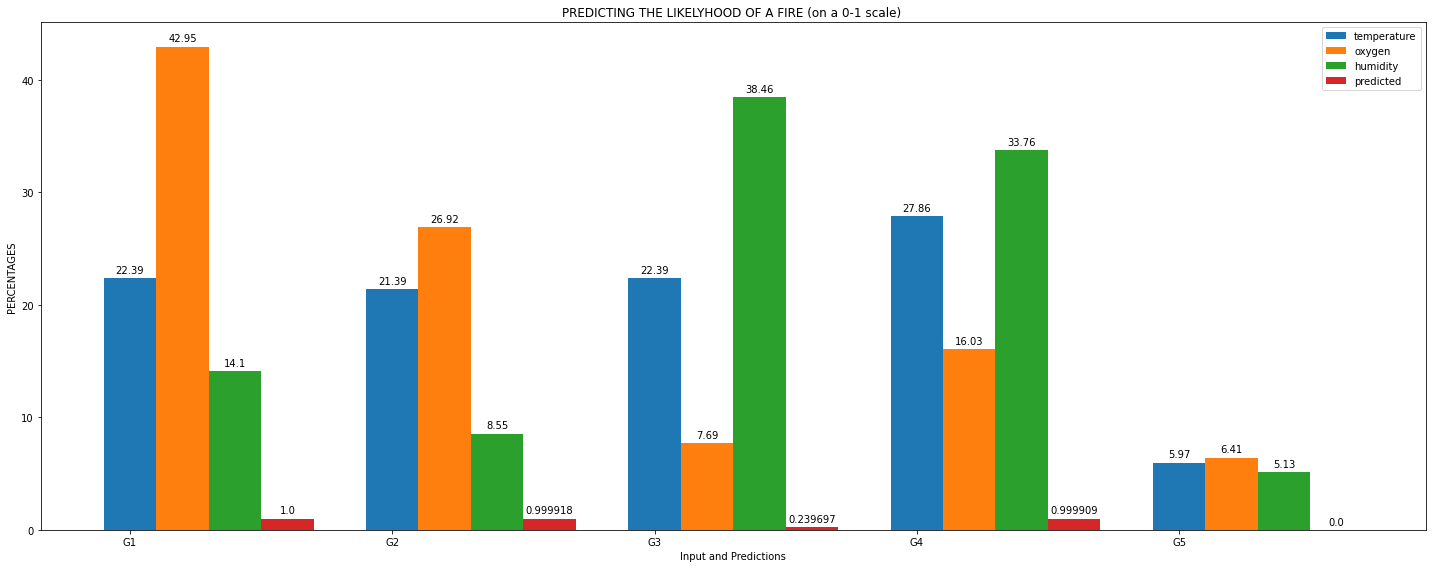

In [108]:
#VISUALIZE THE DATA

#labels = ['G1', 'G2', 'G3', 'G4', 'G5']
temperature = temperatureData
oxygen = oxygenData
humidity = humidityData
prediction = y_pred; # i just realised i have to PERCENTAGIZE 



labels = ['G1', 'G2', 'G3', 'G4', 'G5']

x = np.arange(len(labels))  # the label locations
width = 0.20  # the width of the bars

fig, ax = plt.subplots(figsize=(20,8), facecolor='white')
rects1 = ax.bar(x + 0.00, temperature, width, label='temperature')
rects2 = ax.bar(x + 0.20, oxygen, width, label='oxygen')
rects3 = ax.bar(x + 0.40, humidity, width, label='humidity')
rects4 = ax.bar(x + 0.60, prediction, width, label='predicted')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('PERCENTAGES')
ax.set_xlabel('Input and Predictions')
ax.set_title('PREDICTING THE LIKELYHOOD OF A FIRE (on a 0-1 scale) ')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()

In [ ]:
#dumping the data if using a web application:
#pickle.dump(log_reg.open('model.pk1', 'wb')) #readwrite
#model= pickle.load(open(('model.pk1', 'rb'))) #read only